# Data set summary
This notebook provides a summary of the data set

In [222]:
 # read dataframe from csv or pickle
#df = pd.read_csv('../data/data_processed.csv')
df = pd.read_pickle('../data/stoplocation.pkl') # faster

In [223]:
df.head()

,user,timestamp,latitude,longitude,accuracy,stoplocation
0,153.0,1.386241e+09,55.783641,12.518414,30.689,206
1,153.0,1.386241e+09,55.783681,12.518372,28.185,206
2,153.0,1.386241e+09,55.783646,12.518382,30.841,206
3,153.0,1.386241e+09,55.783648,12.518408,21.368,206
4,153.0,1.386242e+09,55.783680,12.518435,21.000,206


In [227]:
# convert timestamp to time
pd.to_datetime(df['timestamp'], unit='s').head(30)

0    2013-12-05 10:51:31
1    2013-12-05 10:51:34
2    2013-12-05 10:56:46
3    2013-12-05 11:00:49
4    2013-12-05 11:05:36
5    2013-12-05 11:05:41
6    2013-12-05 11:12:05
7    2013-12-05 11:14:43
8    2013-12-05 11:17:23
9    2013-12-05 11:17:23
10   2013-12-05 11:17:24
11   2013-12-05 11:17:25
12   2013-12-05 11:19:27
13   2013-12-05 11:21:27
14   2013-12-05 11:21:28
15   2013-12-05 11:21:28
16   2013-12-05 11:24:28
17   2013-12-05 11:25:28
18   2013-12-05 11:27:28
19   2013-12-05 11:29:28
20   2013-12-05 11:30:28
21   2013-12-05 11:32:29
22   2013-12-05 11:33:28
23   2013-12-05 11:35:29
24   2013-12-05 11:35:29
25   2013-12-05 11:36:28
26   2013-12-05 11:36:30
27   2013-12-05 11:39:30
28   2013-12-05 11:40:30
29   2013-12-05 11:41:30
Name: timestamp, dtype: datetime64[ns]

In [51]:
df.head()

,user,timestamp,latitude,longitude,accuracy,stoplocation,lat_bin,lon_bin,year,month,day,hour
0,153.0,2013-12-05 10:51:31,55.783641,12.518414,30.689,206,135,130,2013,12,5,10
1,153.0,2013-12-05 10:51:34,55.783681,12.518372,28.185,206,135,130,2013,12,5,10
2,153.0,2013-12-05 10:56:46,55.783646,12.518382,30.841,206,135,130,2013,12,5,10
3,153.0,2013-12-05 11:00:49,55.783648,12.518408,21.368,206,135,130,2013,12,5,11
4,153.0,2013-12-05 11:05:36,55.783680,12.518435,21.000,206,135,130,2013,12,5,11


In [80]:
# add a column for the day of the week
df['day_of_week'] = df['timestamp'].dt.day_name()


In [81]:
# add a column for the day of the year
df['day_of_year'] = df['timestamp'].dt.dayofyear


# Map

In [132]:
# create a map object
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=12)

# add a heatmap to the map object
HeatMap(data=df[['latitude', 'longitude']], radius=10).add_to(m)

# display the map
m

# User


In [52]:
# count for every user the amount of unique stop locations
stoplocations_per_user = df.groupby('user').stoplocation.nunique() 


/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


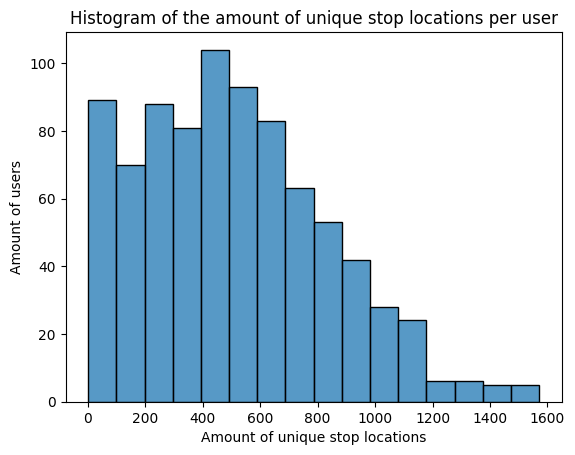

In [68]:
# use seaborn histplot to make a histogram of the amount of stop locations per user
sns.histplot(stoplocations_per_user)
plt.xlabel('Amount of unique stop locations')
plt.ylabel('Amount of users')
plt.title('Histogram of the amount of unique stop locations per user')
# save figure
plt.savefig('../plots/stoplocations_per_user.png')
plt.show()

# Time 

In [83]:
# find the latest and earliest timestamp
latest_timestamp = df.timestamp.max()
earliest_timestamp = df.timestamp.min()
print('Latest timestamp: ', latest_timestamp)
print('Earliest timestamp: ', earliest_timestamp)

Latest timestamp:  2015-09-30 21:59:58
Earliest timestamp:  2013-09-30 22:00:00


In [84]:
# count for every day the amount of unique stop locations
stoplocations_per_day = df.groupby('day_of_year').stoplocation.nunique()



/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

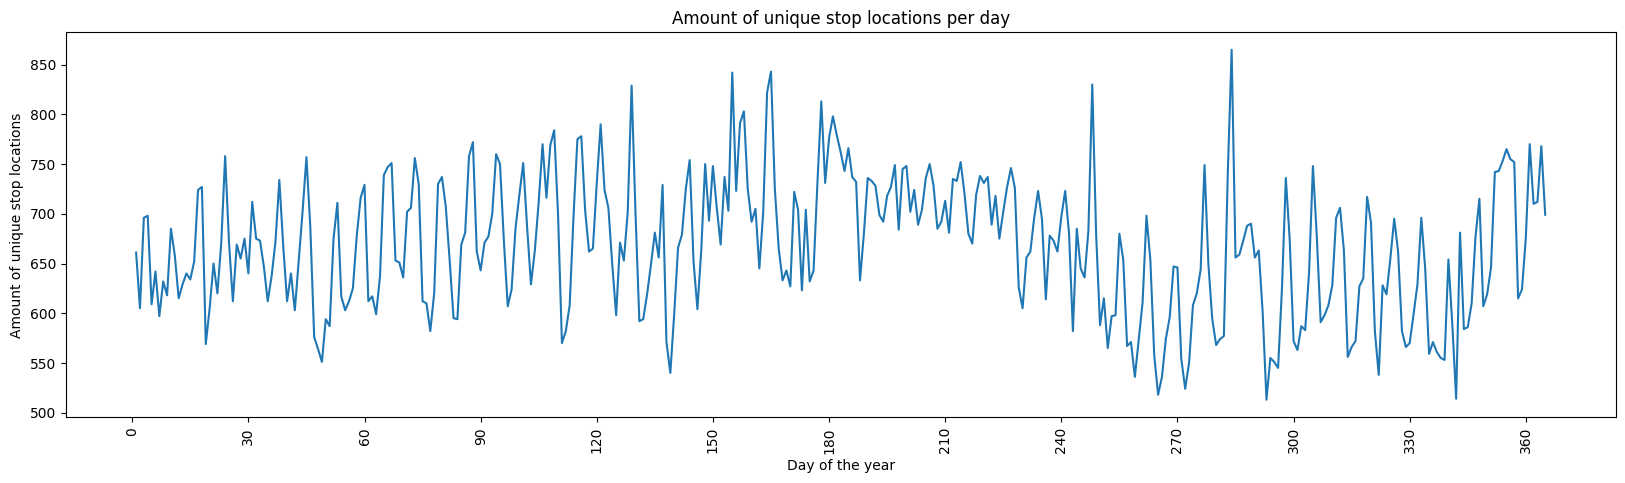

In [111]:
# use seaborn to make a lineplot of the amount of unique stop locations per day
sns.lineplot(data=stoplocations_per_day)
plt.xlabel('Day of the year')
plt.ylabel('Amount of unique stop locations')
plt.title('Amount of unique stop locations per day')
# rotate xticks
plt.xticks(rotation=90)
plt.gcf().set_size_inches(20, 5)
# show only every 14th xtick
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(14))
# save figure
plt.savefig('../plots/stoplocations_per_day_year.png')
plt.show()


/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


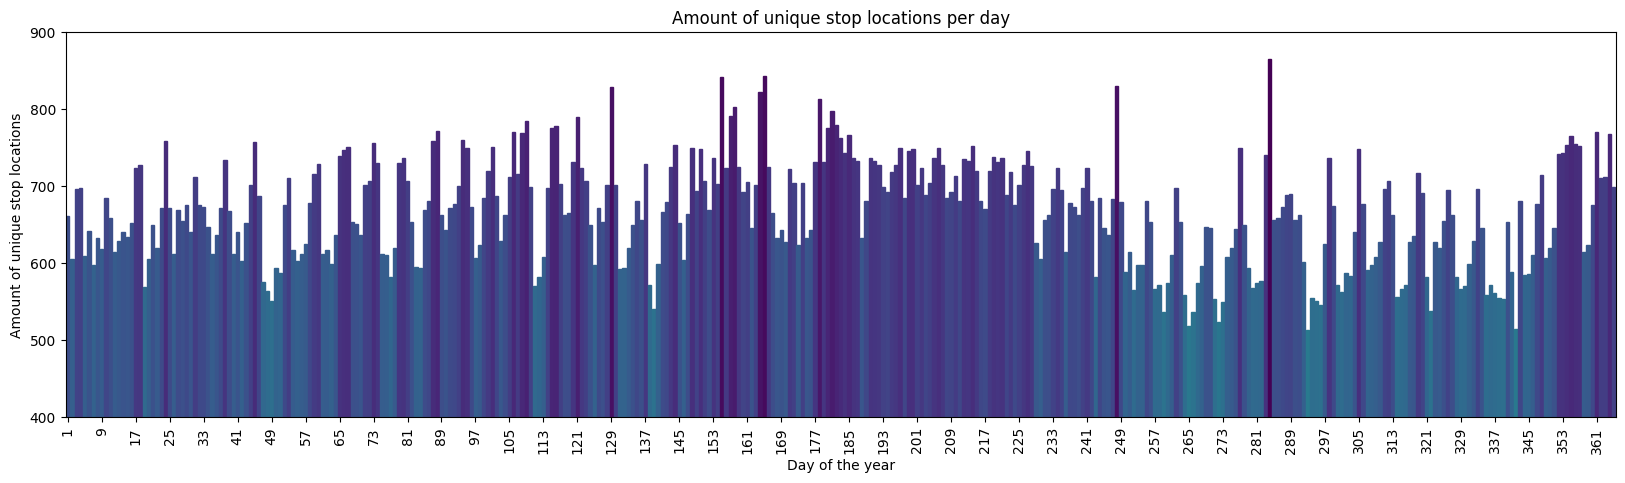

In [129]:
# use seaborn to make a barplot of the amount of unique stop locations per day
sns.barplot(x=stoplocations_per_day.index, y=stoplocations_per_day.values)
plt.xlabel('Day of the year')
plt.ylabel('Amount of unique stop locations')
plt.title('Amount of unique stop locations per day')
# rotate xticks
plt.xticks(rotation=90)
# make figure wider
plt.gcf().set_size_inches(20, 5)
# set color according to value
for i, bar in enumerate(plt.gca().patches):
    bar.set_color(plt.cm.viridis_r(stoplocations_per_day.values[i] / max(stoplocations_per_day.values)))
# show only every 14th xtick
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(60))
plt.ylim(400, 900)

# save figure
plt.savefig('../plots/stoplocations_per_day_year.png')
plt.show()

In [112]:
# count for every month the amount of unique stop locations
stoplocations_per_month = df.groupby(df['timestamp'].dt.month).stoplocation.nunique()


/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


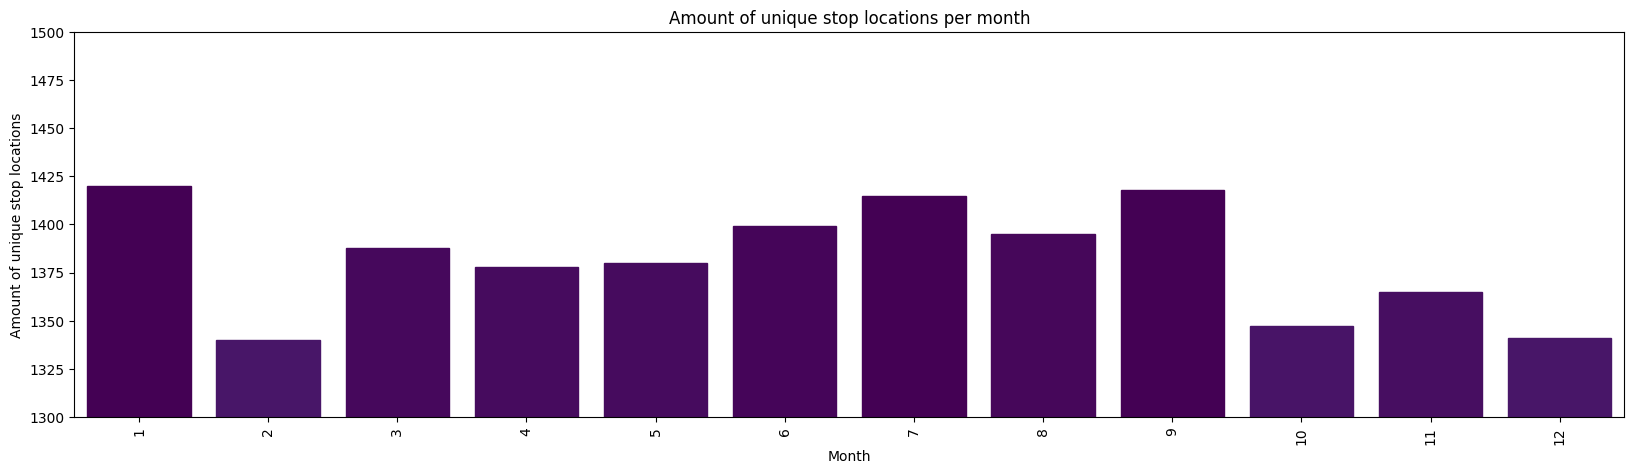

In [131]:
# use seaborn to make a bar plot of the amount of unique stop locations per month
sns.barplot(x=stoplocations_per_month.index, y=stoplocations_per_month.values)
plt.xlabel('Month')
plt.ylabel('Amount of unique stop locations')
plt.title('Amount of unique stop locations per month')
# rotate xticks
plt.xticks(rotation=90)
# make figure wider
plt.gcf().set_size_inches(20, 5)
# set color according to value
for i, bar in enumerate(plt.gca().patches):
    bar.set_color(plt.cm.viridis_r(stoplocations_per_month.values[i] / max(stoplocations_per_month.values)))
# show only every 14th xtick
#plt.gca().xaxis.set_major_locator(plt.MaxNLocator(14))
# set y min value to 1200 and max value to 1600
plt.ylim(1300, 1500)
# save figure
plt.savefig('../plots/stoplocations_per_month.png')
plt.show()

In [75]:
# count for every day of the week the amount of unique stop locations
stoplocations_per_day_of_week = df.groupby('day_of_week').stoplocation.nunique()


/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


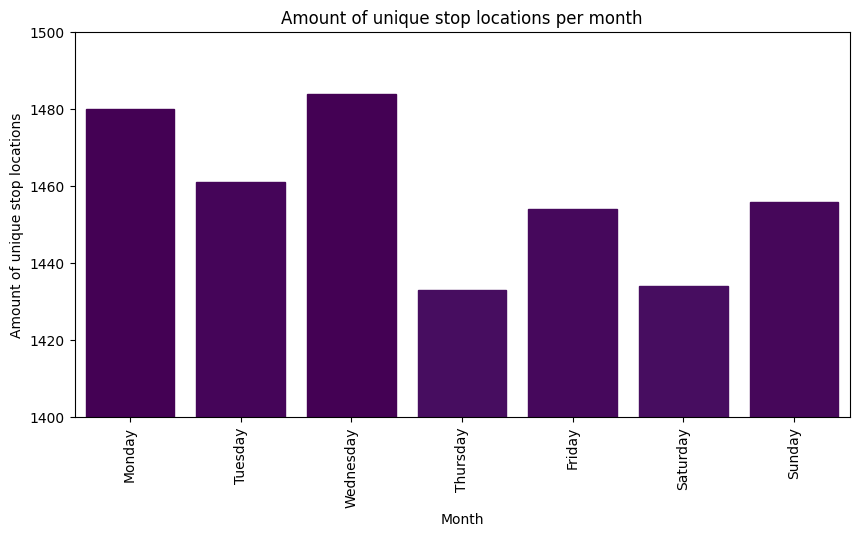

In [126]:
# use seaborn to make a bar plot of the amount of unique stop locations per month
sns.barplot(x=stoplocations_per_day_of_week.index, y=stoplocations_per_day_of_week.values)
plt.xlabel('Month')
plt.ylabel('Amount of unique stop locations')
plt.title('Amount of unique stop locations per month')
# rotate xticks
plt.xticks(rotation=90)
# make figure wider
plt.gcf().set_size_inches(10, 5)
# set color according to value
for i, bar in enumerate(plt.gca().patches):
    bar.set_color(plt.cm.viridis_r(stoplocations_per_day_of_week.values[i] / max(stoplocations_per_day_of_week.values)))
# show only every 14th xtick
#plt.gca().xaxis.set_major_locator(plt.MaxNLocator(14))
# set y min value to 1200 and max value to 1600
plt.ylim(1400, 1500)
# sort x axis and values by day of the week
# save figure
plt.savefig('../plots/stoplocations_per_day_of_week.png')
plt.show()

In [127]:
stoplocations_per_day_of_week

day_of_week
Friday       1480
Monday       1461
Saturday     1484
Sunday       1433
Thursday     1454
Tuesday      1434
Wednesday    1456
Name: stoplocation, dtype: int64

# Outlier detection

In [53]:
# show all users with less than 10 stop locations
stoplocations_per_user[stoplocations_per_user < 10]

user
316.0    5
417.0    1
454.0    2
603.0    5
710.0    5
714.0    4
727.0    8
732.0    2
742.0    3
796.0    3
813.0    9
821.0    1
841.0    4
846.0    2
Name: stoplocation, dtype: int64

In [30]:
# select the data of user 813
df_user_813 = df[df.user == 813]
df_user_813.head()



,user,timestamp,latitude,longitude,accuracy,stoplocation
234483659,813.0,1.389703e+09,55.783861,12.516848,28.000,-1
234483660,813.0,1.389703e+09,55.783861,12.516848,19.435,-1
234483661,813.0,1.389703e+09,55.783861,12.516847,27.000,-1
234483662,813.0,1.389704e+09,55.783699,12.517343,20.000,-1
234483663,813.0,1.389704e+09,55.783718,12.517385,20.000,-1


In [34]:
# plot the stop locations of user 813 on a map
import folium
from folium.plugins import MarkerCluster

# create map
m = folium.Map(location=[55.8, 12.51], zoom_start=10)

# add marker for every stop location
for index, row in df_user_813.iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(m)

# show map
m


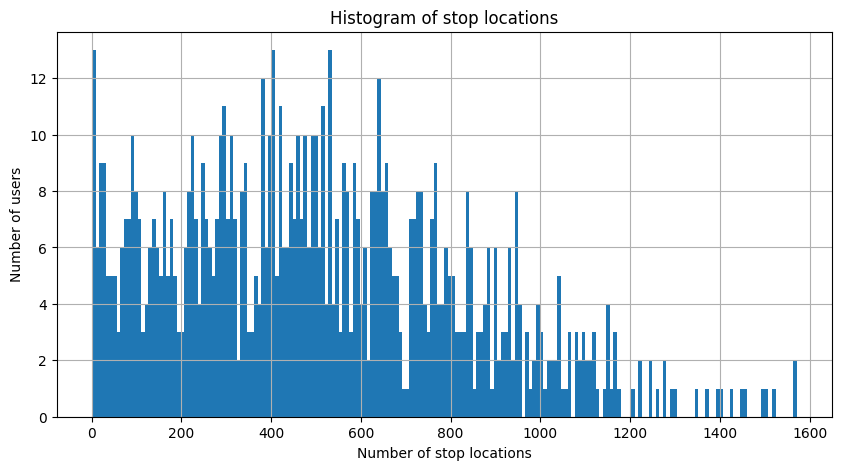

In [25]:
# plot histogram for stoplocations per user
stoplocations_per_user.hist(bins=200, figsize=(10,5))
plt.xlabel('Number of stop locations')
plt.ylabel('Number of users')
plt.title('Histogram of stop locations')
plt.show()


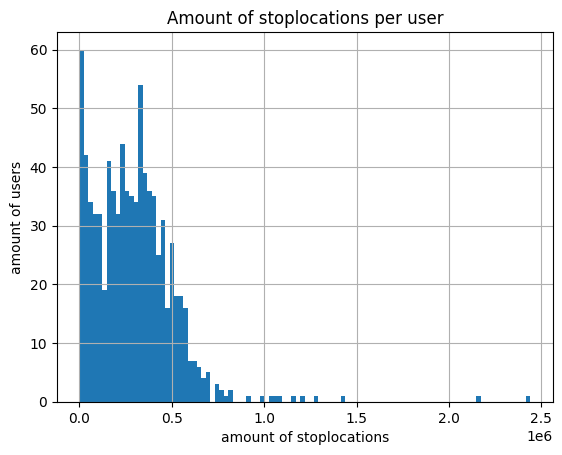

In [13]:
# plot amount of stoplocations per user
df.groupby('user').size().hist(bins=100)
plt.xlabel('amount of stoplocations')
plt.ylabel('amount of users')
plt.title('Amount of stoplocations per user')
plt.show()